In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import time
from functools import reduce

In [2]:
@nb.jit(nopython=True)
def bubble_sort(a):
    # warning: array is sorted inplace
    n = len(a)
    for j in range(n-1):
        moved = False
        for i in range(1,n):
            if a[i]<a[i-1]:
                a[i], a[i-1] = a[i-1], a[i]
                moved = True
        if not moved:
            return a
    return a  

In [3]:
bubble_sort(np.asarray([1.0]))  # force numba to compile the function for float arrays

array([1.])

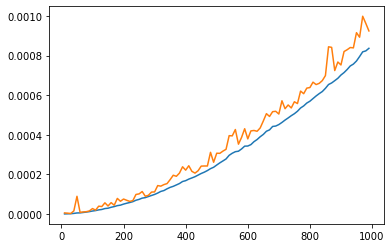

In [4]:
x = list(range(10,1000,10)) # list of array length for our test
N = 100 # number of samples for every array length
y = [] # list of average times for each array length
y_max = [] # list of maximum times for each array length
for n in x: # iterating over array lengths
    total_time = 0
    max_time = 0
    for k in range(N): # sort random array and add the time
        myarr = np.random.rand(n)
        start = time.time()
        bubble_sort(myarr)
        end = time.time()
        total_time+=end-start
        max_time = max(end-start, max_time)
    y.append(total_time/N)
    y_max.append(max_time)
    
plt.plot(x,y)
plt.plot(x,y_max)

In [5]:
def radix_sort(a,K,A): # a - массив, K - число разрядов, A - основание
    mylist = list(a)
    for k in range(K):
        mytable = [list() for i in range(A)]
        for i in mylist:
            mytable[(i//(A**k) % A)].append(i)
        mylist = list()
        for j in mytable:
            mylist += j
    return mylist

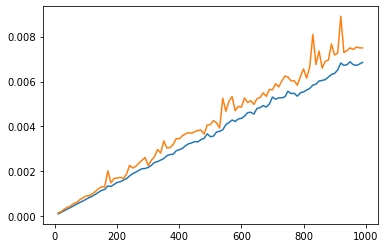

In [6]:
x = list(range(10,1000,10)) # list of array length for our test
N = 100 # number of samples for every array length
y = [] # list of average times for each array length
y_max = [] # list of maximum times for each array length
for n in x:
    total_time = 0
    max_time = 0
    for k in range(N): # sort random array and add the time
        myarr = np.random.randint(0,10000,n)
        start = time.time()
        radix_sort(myarr,10,10)
        end = time.time()
        total_time+=end-start
        max_time = max(max_time, end-start)
    y.append(total_time/N)   
    y_max.append(max_time)
plt.plot(x,y)
plt.plot(x,y_max)

In [7]:
def merge(a,b):
    
    result = []
    
    i = 0 # pointer for a
    j = 0 # pointer for b
    
    for k in range(len(a)+len(b)):
        if a[i]<b[j]:
            result.append(a[i])
            i+=1
            if i>len(a)-1:
                result += b[j:]
                return result
            
        else:
            result.append(b[j])
            j+=1
            if j>len(b)-1:
                result += a[i:]
                return result
            
    return result

In [8]:
def merge_sort(a):
    n = len(a)
    if n == 1:
        return a
    arr_1 = a[:len(a)//2]
    arr_2  = a[len(a)//2:]
    return merge(merge_sort(arr_1),merge_sort(arr_2))

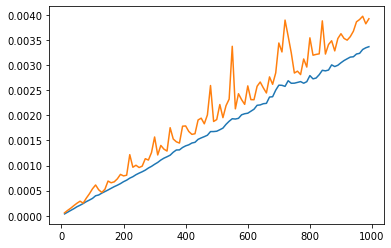

In [9]:
x = list(range(10,1000,10)) 
N = 100
y = []
y_max = []
for n in x:
    total_time = 0
    max_time = 0
    for k in range(N):
        myarr = np.random.rand(n)
        start = time.time()
        merge_sort(myarr)
        end = time.time()
        total_time+=end-start
        max_time = max(end-start, max_time)
    y.append(total_time/N)   
    y_max.append(max_time)
    
plt.plot(x,y)
plt.plot(x,y_max)